In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [7]:
# read in data and split the training set into training set and validation set
train = pd.read_csv('train_features.csv')
label = pd.read_csv('train_labels.csv')
test = pd.read_csv('test_features.csv')
X_train, X_val, y_train, y_val = train_test_split(train, label, test_size=0.2, random_state=1) 
# X_train.shape, X_val.shape

# Decision Tree

In [8]:
# Tune different criterion for decision tree: gini and entropy
# criterion = gini
clf = DecisionTreeClassifier(criterion="gini", max_depth=5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_val)
print("Accuracy(Gini):",metrics.accuracy_score(y_val, y_pred))

# criterion = entropy
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_val)
print("Accuracy(Entropy):",metrics.accuracy_score(y_val, y_pred))

Accuracy(Gini): 0.568
Accuracy(Entropy): 0.58


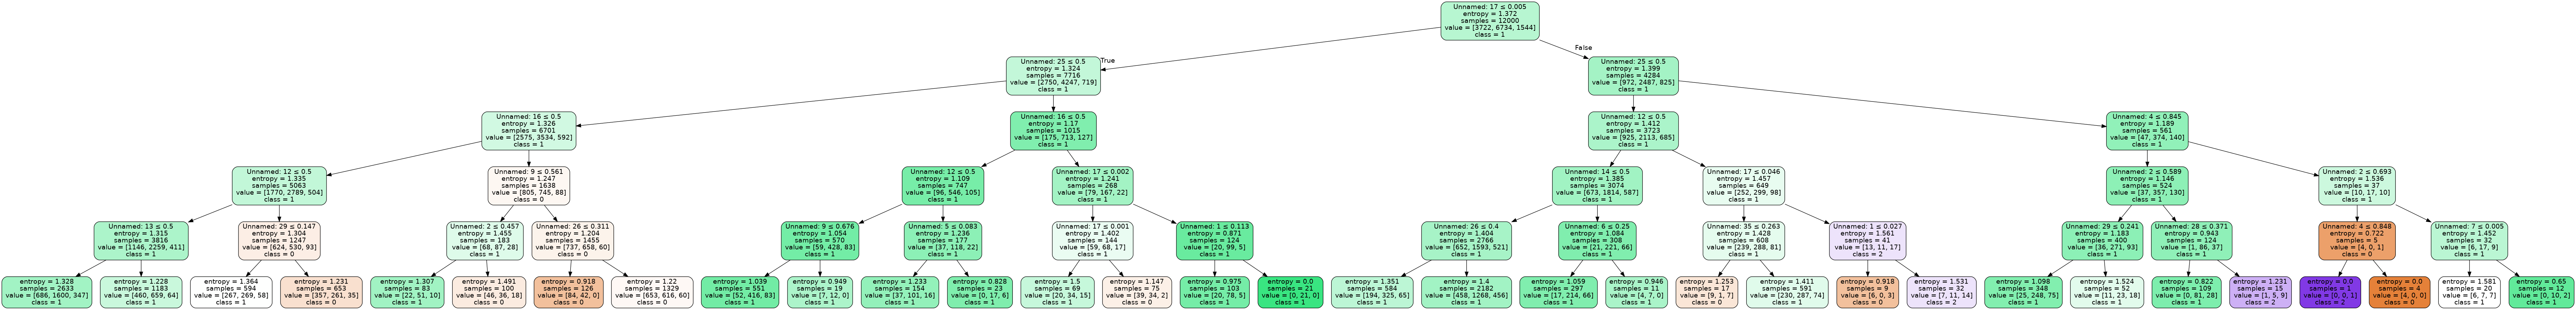

In [9]:
# visulization of dicision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.keys(),class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [10]:
# Fix criterion, tune different max_depth(1,3,5,8,10,100,1000)
for dp in (1,3, 5,8,10,100,1000):
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=dp)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_val)
    print("Accuracy("+ str(dp) +"):",metrics.accuracy_score(y_val, y_pred))

Accuracy(1): 0.5553333333333333
Accuracy(3): 0.5693333333333334
Accuracy(5): 0.58
Accuracy(8): 0.5696666666666667
Accuracy(10): 0.552
Accuracy(100): 0.4643333333333333
Accuracy(1000): 0.467


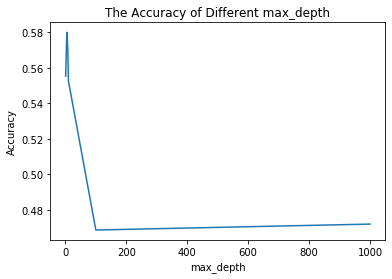

In [11]:
# Plot
x = [1,3,5,8,10,100,1000]
y = [0.5553333333333333, 0.5693333333333334,0.58,0.5703333333333334,0.5526666666666666,0.4686666666666667,0.472]
l1=plt.plot(x,y,label='type1')
plt.title('The Accuracy of Different max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

# Decision Forest 

In [17]:
# Fix criterion, max_depth and tune different number of tress(i.e. n_estimators): (1, 10, 100, 1000)
for ne in (1, 10,100,1000):
    clf = RandomForestClassifier(max_depth=5, n_estimators=ne, criterion='entropy',random_state=1)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_val)
    print("Accuracy("+ str(ne) +"):",metrics.accuracy_score(y_val, y_pred))

/home/jingxianhuang96/anaconda3/envs/kag/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/home/jingxianhuang96/anaconda3/envs/kag/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy(1): 0.5563333333333333
Accuracy(10): 0.5593333333333333


/home/jingxianhuang96/anaconda3/envs/kag/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy(100): 0.557


/home/jingxianhuang96/anaconda3/envs/kag/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy(1000): 0.5553333333333333


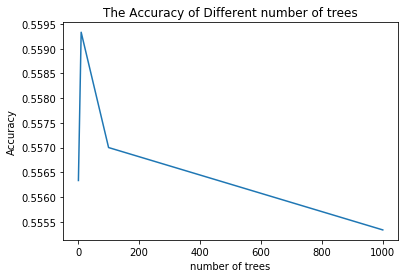

In [19]:
# Plot
x = [1,10,100,1000]
y = [0.5563333333333333, 0.5593333333333333, 0.557, 0.5553333333333333]
l1=plt.plot(x,y,label='type1')
plt.title('The Accuracy of Different number of trees')
plt.xlabel('number of trees')
plt.ylabel('Accuracy')
plt.show()

# Neural Network

In [26]:
# Data loader and loss function
X_train =  torch.from_numpy(np.array(X_train)).type(torch.FloatTensor)
y_train = torch.from_numpy(np.array(y_train)).type(torch.FloatTensor)
trainset = torch.cat((X_train, y_train),1)
X_val =  torch.from_numpy(np.array(X_val)).type(torch.FloatTensor)
y_val = torch.from_numpy(np.array(y_val)).type(torch.FloatTensor)
criterion = nn.CrossEntropyLoss()
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10,
                                          shuffle=True, num_workers=0)


In [29]:
# Test different dimension of hidden layer

# Three networks with different dimension
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.fc1 = nn.Linear(36, 24)
        self.fc2 = nn.Linear(24, 12)
        self.fc3 = nn.Linear(12, 3)
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x
net1 = Net1()

class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(36, 36)
        self.fc2 = nn.Linear(36, 36)
        self.fc3 = nn.Linear(36, 3)
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x
net2 = Net2()

class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.fc1 = nn.Linear(36, 48)
        self.fc2 = nn.Linear(48, 64)
        self.fc3 = nn.Linear(64, 3)
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x
net3 = Net3()


In [30]:
# train for net1
optimizer = optim.SGD(net1.parameters(), lr=0.001, momentum=0.9)
for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[:,:-1], data[:,-1]
        optimizer.zero_grad()
        outputs = net1(inputs)
        labels = torch.tensor(labels, dtype=torch.long)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('[epoch %d] loss: %.3f' %(epoch + 1, running_loss / 1200))
print('Finished Training')
outputs = net1(X_val)
_, predicted = torch.max(outputs, 1)
print("Accuracy(net1):",metrics.accuracy_score(y_val, predicted))

/home/jingxianhuang96/anaconda3/envs/kag/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


[epoch 1] loss: 0.958
[epoch 2] loss: 0.952
[epoch 3] loss: 0.952
[epoch 4] loss: 0.951
[epoch 5] loss: 0.951
[epoch 6] loss: 0.951
[epoch 7] loss: 0.952
[epoch 8] loss: 0.951
[epoch 9] loss: 0.951
[epoch 10] loss: 0.951
[epoch 11] loss: 0.951
[epoch 12] loss: 0.951
[epoch 13] loss: 0.951
[epoch 14] loss: 0.951
[epoch 15] loss: 0.951
[epoch 16] loss: 0.951
[epoch 17] loss: 0.951
[epoch 18] loss: 0.950
[epoch 19] loss: 0.951
[epoch 20] loss: 0.950
[epoch 21] loss: 0.950
[epoch 22] loss: 0.950
[epoch 23] loss: 0.949
[epoch 24] loss: 0.949
[epoch 25] loss: 0.949
[epoch 26] loss: 0.948
[epoch 27] loss: 0.948
[epoch 28] loss: 0.947
[epoch 29] loss: 0.947
[epoch 30] loss: 0.946
[epoch 31] loss: 0.945
[epoch 32] loss: 0.944
[epoch 33] loss: 0.943
[epoch 34] loss: 0.942
[epoch 35] loss: 0.940
[epoch 36] loss: 0.938
[epoch 37] loss: 0.936
[epoch 38] loss: 0.935
[epoch 39] loss: 0.932
[epoch 40] loss: 0.930
[epoch 41] loss: 0.928
[epoch 42] loss: 0.926
[epoch 43] loss: 0.924
[epoch 44] loss: 0.9

In [31]:
# train for net2
optimizer = optim.SGD(net2.parameters(), lr=0.001, momentum=0.9)
for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[:,:-1], data[:,-1]
        optimizer.zero_grad()
        outputs = net2(inputs)
        labels = torch.tensor(labels, dtype=torch.long)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('[epoch %d] loss: %.3f' %(epoch + 1, running_loss / 1200))
print('Finished Training')
outputs = net2(X_val)
_, predicted = torch.max(outputs, 1)
print("Accuracy(net2):",metrics.accuracy_score(y_val, predicted))

/home/jingxianhuang96/anaconda3/envs/kag/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


[epoch 1] loss: 0.957
[epoch 2] loss: 0.953
[epoch 3] loss: 0.953
[epoch 4] loss: 0.953
[epoch 5] loss: 0.953
[epoch 6] loss: 0.952
[epoch 7] loss: 0.953
[epoch 8] loss: 0.952
[epoch 9] loss: 0.952
[epoch 10] loss: 0.952
[epoch 11] loss: 0.952
[epoch 12] loss: 0.952
[epoch 13] loss: 0.952
[epoch 14] loss: 0.952
[epoch 15] loss: 0.952
[epoch 16] loss: 0.952
[epoch 17] loss: 0.951
[epoch 18] loss: 0.952
[epoch 19] loss: 0.951
[epoch 20] loss: 0.951
[epoch 21] loss: 0.951
[epoch 22] loss: 0.950
[epoch 23] loss: 0.951
[epoch 24] loss: 0.950
[epoch 25] loss: 0.950
[epoch 26] loss: 0.950
[epoch 27] loss: 0.949
[epoch 28] loss: 0.949
[epoch 29] loss: 0.949
[epoch 30] loss: 0.948
[epoch 31] loss: 0.948
[epoch 32] loss: 0.947
[epoch 33] loss: 0.946
[epoch 34] loss: 0.944
[epoch 35] loss: 0.943
[epoch 36] loss: 0.942
[epoch 37] loss: 0.940
[epoch 38] loss: 0.938
[epoch 39] loss: 0.937
[epoch 40] loss: 0.934
[epoch 41] loss: 0.932
[epoch 42] loss: 0.930
[epoch 43] loss: 0.927
[epoch 44] loss: 0.9

In [32]:
# train for net3
optimizer = optim.SGD(net3.parameters(), lr=0.001, momentum=0.9)
for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[:,:-1], data[:,-1]
        optimizer.zero_grad()
        outputs = net3(inputs)
        labels = torch.tensor(labels, dtype=torch.long)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('[epoch %d] loss: %.3f' %(epoch + 1, running_loss / 1200))
print('Finished Training')
outputs = net3(X_val)
_, predicted = torch.max(outputs, 1)
print("Accuracy(net3):",metrics.accuracy_score(y_val, predicted))

/home/jingxianhuang96/anaconda3/envs/kag/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


[epoch 1] loss: 0.956
[epoch 2] loss: 0.953
[epoch 3] loss: 0.953
[epoch 4] loss: 0.953
[epoch 5] loss: 0.953
[epoch 6] loss: 0.952
[epoch 7] loss: 0.953
[epoch 8] loss: 0.953
[epoch 9] loss: 0.953
[epoch 10] loss: 0.953
[epoch 11] loss: 0.953
[epoch 12] loss: 0.952
[epoch 13] loss: 0.953
[epoch 14] loss: 0.953
[epoch 15] loss: 0.952
[epoch 16] loss: 0.952
[epoch 17] loss: 0.952
[epoch 18] loss: 0.951
[epoch 19] loss: 0.951
[epoch 20] loss: 0.949
[epoch 21] loss: 0.950
[epoch 22] loss: 0.949
[epoch 23] loss: 0.948
[epoch 24] loss: 0.947
[epoch 25] loss: 0.946
[epoch 26] loss: 0.945
[epoch 27] loss: 0.944
[epoch 28] loss: 0.943
[epoch 29] loss: 0.941
[epoch 30] loss: 0.939
[epoch 31] loss: 0.936
[epoch 32] loss: 0.934
[epoch 33] loss: 0.931
[epoch 34] loss: 0.928
[epoch 35] loss: 0.926
[epoch 36] loss: 0.924
[epoch 37] loss: 0.922
[epoch 38] loss: 0.920
[epoch 39] loss: 0.921
[epoch 40] loss: 0.919
[epoch 41] loss: 0.918
[epoch 42] loss: 0.917
[epoch 43] loss: 0.916
[epoch 44] loss: 0.9

In [34]:
# tune the activate function: relu and sigmoid
# since net1 trains for sigmoid, I only need to use the same hyper parameter for relu
class Net4(nn.Module):
    def __init__(self):
        super(Net4, self).__init__()
        self.fc1 = nn.Linear(36, 24)
        self.fc2 = nn.Linear(24, 12)
        self.fc3 = nn.Linear(12, 3)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net4 = Net4()

In [35]:

optimizer = optim.SGD(net4.parameters(), lr=0.001, momentum=0.9)
for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[:,:-1], data[:,-1]
        optimizer.zero_grad()
        outputs = net4(inputs)
        labels = torch.tensor(labels, dtype=torch.long)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('[epoch %d] loss: %.3f' %(epoch + 1, running_loss / 1200))
print('Finished Training')
outputs = net4(X_val)
_, predicted = torch.max(outputs, 1)
print("Accuracy(relu):",metrics.accuracy_score(y_val, predicted))

/home/jingxianhuang96/anaconda3/envs/kag/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


[epoch 1] loss: 0.958
[epoch 2] loss: 0.946
[epoch 3] loss: 0.937
[epoch 4] loss: 0.926
[epoch 5] loss: 0.918
[epoch 6] loss: 0.913
[epoch 7] loss: 0.910
[epoch 8] loss: 0.908
[epoch 9] loss: 0.906
[epoch 10] loss: 0.905
[epoch 11] loss: 0.904
[epoch 12] loss: 0.903
[epoch 13] loss: 0.901
[epoch 14] loss: 0.900
[epoch 15] loss: 0.900
[epoch 16] loss: 0.899
[epoch 17] loss: 0.899
[epoch 18] loss: 0.898
[epoch 19] loss: 0.898
[epoch 20] loss: 0.897
[epoch 21] loss: 0.897
[epoch 22] loss: 0.897
[epoch 23] loss: 0.896
[epoch 24] loss: 0.896
[epoch 25] loss: 0.895
[epoch 26] loss: 0.895
[epoch 27] loss: 0.895
[epoch 28] loss: 0.895
[epoch 29] loss: 0.895
[epoch 30] loss: 0.894
[epoch 31] loss: 0.894
[epoch 32] loss: 0.894
[epoch 33] loss: 0.894
[epoch 34] loss: 0.894
[epoch 35] loss: 0.893
[epoch 36] loss: 0.893
[epoch 37] loss: 0.893
[epoch 38] loss: 0.893
[epoch 39] loss: 0.892
[epoch 40] loss: 0.892
[epoch 41] loss: 0.892
[epoch 42] loss: 0.891
[epoch 43] loss: 0.892
[epoch 44] loss: 0.8

In [58]:
# tune different learning rate (0.001, 0.01, 0.1, 1)
lrate = 0.001
for i in range(4):
    net = Net1()
    optimizer = optim.SGD(net.parameters(), lr=lrate, momentum=0.9)
    lrate*=10
    for epoch in range(100):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[:,:-1], data[:,-1]
            optimizer.zero_grad()
            outputs = net(inputs)
            labels = torch.tensor(labels, dtype=torch.long)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
#         print('[epoch %d] loss: %.3f' %(epoch + 1, running_loss / 1200))
#     print('Finished Training')
    outputs = net(X_val)
    _, predicted = torch.max(outputs, 1)
    print("Accuracy(lr:" + str(lrate/10)+"):",metrics.accuracy_score(y_val, predicted))
    

/home/jingxianhuang96/anaconda3/envs/kag/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]


Accuracy(lr:0.001): 0.5723333333333334
Accuracy(lr:0.01): 0.5806666666666667
Accuracy(lr:0.1): 0.5696666666666667
Accuracy(lr:1.0): 0.5543333333333333


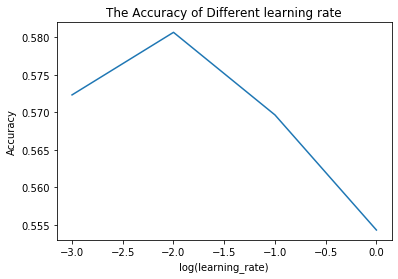

In [59]:
# Plot
x = [-3,-2,-1,0]
y = [0.5723333333333334, 0.5806666666666667, 0.5696666666666667, 0.5543333333333333]
l1=plt.plot(x,y,label='type1')
plt.title('The Accuracy of Different learning rate')
plt.xlabel('log(learning_rate)')
plt.ylabel('Accuracy')
plt.show()

# Cross validation

In [86]:
# split the training set and make five sets for cross validation
train = np.array(train)
label = np.array(label)
t1,t2,t3,t4,t5 = train[:3000,:],train[3000:6000,:],train[6000:9000,:],train[9000:12000,:],train[12000:,:]
l1,l2,l3,l4,l5 = label[:3000],label[3000:6000],label[6000:9000],label[9000:12000],label[12000:]
X_train1, X_val1, y_train1, y_val1 = np.concatenate([t1,t2,t3,t4]),t5,np.concatenate([l1,l2,l3,l4]), l5
X_train2, X_val2, y_train2, y_val2 = np.concatenate([t1,t2,t3,t5]),t4,np.concatenate([l1,l2,l3,l5]), l4
X_train3, X_val3, y_train3, y_val3 = np.concatenate([t1,t2,t4,t5]),t3,np.concatenate([l1,l2,l4,l5]), l3
X_train4, X_val4, y_train4, y_val4 = np.concatenate([t1,t3,t4,t5]),t2,np.concatenate([l1,l3,l4,l5]), l2
X_train5, X_val5, y_train5, y_val5 = np.concatenate([t2,t3,t4,t5]),t1,np.concatenate([l2,l3,l4,l5]), l1
crossval = {0: (X_train1, X_val1, y_train1, y_val1),
                1: (X_train2, X_val2, y_train2, y_val2),
                2: (X_train3, X_val3, y_train3, y_val3),
                3: (X_train4, X_val4, y_train4, y_val4),
                4: (X_train5, X_val5, y_train5, y_val5)
           }

In [63]:
# build the NN model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(36, 24)
        self.fc2 = nn.Linear(24, 12)
        self.fc3 = nn.Linear(12, 3)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [73]:
# try five datasets and select the model that make the best prediction
# on validation set
models = {}
for j in range(5):
    X_train, X_val, y_train, y_val = crossval[j]
    X_train =  torch.from_numpy(np.array(X_train)).type(torch.FloatTensor)
    y_train = torch.from_numpy(np.array(y_train)).type(torch.FloatTensor)
    trainset = torch.cat((X_train, y_train),1)
    X_val =  torch.from_numpy(np.array(X_val)).type(torch.FloatTensor)
    y_val = torch.from_numpy(np.array(y_val)).type(torch.FloatTensor)
    criterion = nn.CrossEntropyLoss()
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=10,
                                              shuffle=True, num_workers=0)
    net = Net()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    for epoch in range(100):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[:,:-1], data[:,-1]
            optimizer.zero_grad()
            outputs = net(inputs)
            labels = torch.tensor(labels, dtype=torch.long)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
#     print('Finished Training dataset'+str(j+1)), 
    outputs = net(X_val)
    _, predicted = torch.max(outputs, 1)
    print('Finished Training dataset'+str(j+1)+". Accuracy(dataset:" + str(j+1)+"):",metrics.accuracy_score(y_val, predicted))
    models[j] = net
    

/home/jingxianhuang96/anaconda3/envs/kag/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Finished Training dataset1. Accuracy(dataset:1): 0.5596666666666666
Finished Training dataset2. Accuracy(dataset:2): 0.587
Finished Training dataset3. Accuracy(dataset:3): 0.577
Finished Training dataset4. Accuracy(dataset:4): 0.5736666666666667
Finished Training dataset5. Accuracy(dataset:5): 0.5763333333333334


In [83]:
# select the best model
best_net = models[1]
X_train, X_val, y_train, y_val = crossval[1]
X_train =  torch.from_numpy(np.array(X_train)).type(torch.FloatTensor)
y_train = torch.from_numpy(np.array(y_train)).type(torch.FloatTensor)
X_val =  torch.from_numpy(np.array(X_val)).type(torch.FloatTensor)
y_val = torch.from_numpy(np.array(y_val)).type(torch.FloatTensor)
outputs = best_net(X_val)
_, predicted = torch.max(outputs, 1)
print("Accuracy(validation):",metrics.accuracy_score(y_val, predicted))

Accuracy: 0.587


In [85]:
# apply the model on training set to check if it is overfit
outputs = best_net(X_train)
_, predicted = torch.max(outputs, 1)
print("Accuracy(train):",metrics.accuracy_score(y_train, predicted))

Accuracy(train): 0.5785833333333333


In [81]:
# apply the best model on the test set and generate the result
test = torch.from_numpy(np.array(test)).type(torch.FloatTensor)
outputs = best_net(test)
_, predicted = torch.max(outputs, 1)
pd.DataFrame(np.array(predicted)).to_csv("test_res.csv")